# In this challenge, we will develop an AI model to predict water needs, which can aid in effective water management and conservation efforts.


---



# Step 1: Load Water Usage Data into Google Colab


---


**Objective**: Load the water usage data into Google Colab for analysis and modeling.

**Outcome**: A DataFrame containing the water usage data.

**Instructions**:

* Upload the water quality dataset to your Google Colab environment.
* Load the dataset into a DataFrame.

In [ ]:
import pandas as pd

# Upload the dataset
from google.colab import files
uploaded = files.upload()

# Load the dataset
water_data = pd.read_csv("water_potability.csv")

# Display the first few rows
water_data.head()


Saving water_potability.csv to water_potability (1).csv


ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

# Visualization 1: Plot the Water Usage Data Distribution


---


**Objective**: Visualize the distribution of water usage data to understand its characteristics.

**Outcome**: A histogram plot showing the distribution of water usage data.

**Instructions**:

* Create a histogram plot to visualize the distribution of water usage.

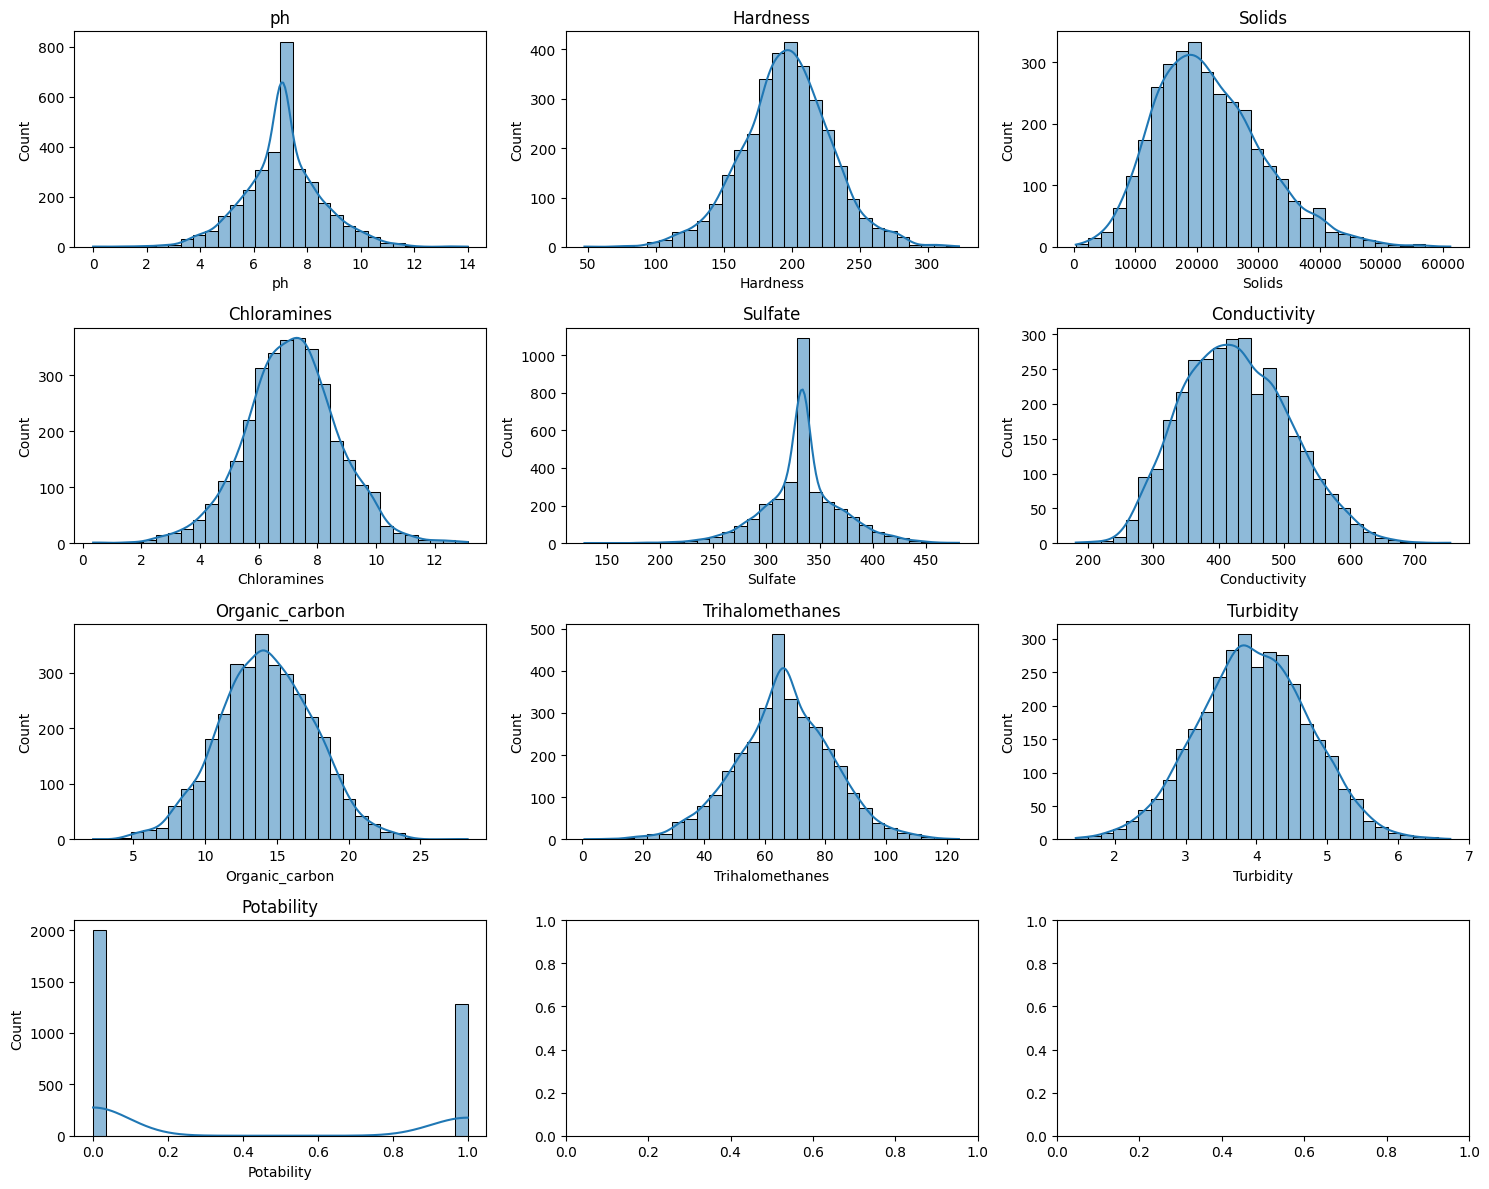

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of all features
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
axes = axes.flatten()
for i, col in enumerate(water_data.columns):
    sns.histplot(water_data[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(col)
plt.tight_layout()
plt.show()


# Step 2: Process and Prepare Data


---



**Objective**: Prepare the data for training by handling missing values and standardizing features.

**Outcome**: Cleaned and standardized dataset ready for model training.

**Instructions**:

* Handle missing values by dropping them or imputing.
* Standardize the features to ensure all are on a similar scale.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Drop rows with missing values
water_data = water_data.dropna()

# Separate features and target variable
X = water_data.drop('Potability', axis=1)
y = water_data['Potability']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Step 3: Create a Simple AI Model Using TensorFlow to Predict Water Potability


---



**Objective**: Build a neural network model to predict water potability.

**Outcome**: A basic neural network model for predicting water potability.

**Instructions**:

* Build and compile the model.
* Train the model on the training data.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Build the neural network model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=32)


Epoch 1/100
66/66 [==============================] - 2s 8ms/step - loss: 0.6757 - accuracy: 0.5973 - val_loss: 0.6659 - val_accuracy: 0.6069
Epoch 2/100
66/66 [==============================] - 0s 3ms/step - loss: 0.6535 - accuracy: 0.6245 - val_loss: 0.6463 - val_accuracy: 0.6317
Epoch 3/100
66/66 [==============================] - 0s 3ms/step - loss: 0.6380 - accuracy: 0.6388 - val_loss: 0.6274 - val_accuracy: 0.6679
Epoch 4/100
66/66 [==============================] - 0s 3ms/step - loss: 0.6214 - accuracy: 0.6608 - val_loss: 0.6119 - val_accuracy: 0.6756
Epoch 5/100
66/66 [==============================] - 0s 4ms/step - loss: 0.6116 - accuracy: 0.6780 - val_loss: 0.6090 - val_accuracy: 0.6737
Epoch 6/100
66/66 [==============================] - 0s 3ms/step - loss: 0.5985 - accuracy: 0.6908 - val_loss: 0.6030 - val_accuracy: 0.6737
Epoch 7/100
66/66 [==============================] - 0s 3ms/step - loss: 0.5961 - accuracy: 0.6889 - val_loss: 0.5966 - val_accuracy: 0.6794
Epoch 8/100
6

# Visualization 2: Visualize the Training Process


---


**Objective**: Monitor the model’s performance during training.


**Outcome**:  Line plots showing the training and validation loss over epochs.

**Instructions**:

* Plot the training and validation loss.





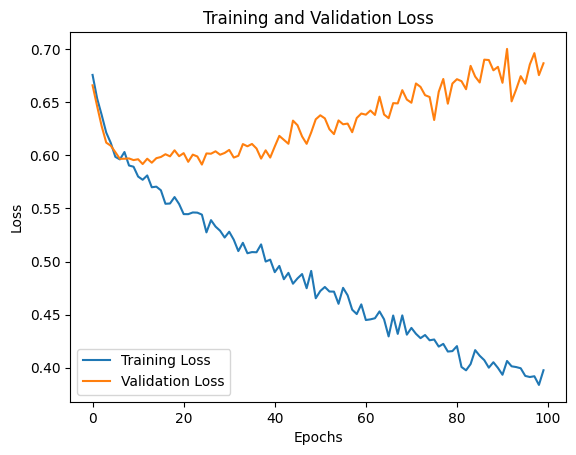

In [ ]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


# Step 4: Document the Model's Performance and Prepare It for Integration



---


**Objective**: Evaluate the model and document its performance.

**Outcome**: Model evaluation metrics and preparations for integration into the final project.

**Instructions**:

* Evaluate the model on the test set.
* Prepare the model for integration.


In [ ]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

# Save the model for later use
model.save('water_potability_model.h5')

21/21 [==============================] - 0s 7ms/step - loss: 0.7046 - accuracy: 0.6494
Test Accuracy: 0.6494


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Visualization 3:  Plot a Confusion Matrix to Evaluate the Model's Effectiveness


---


**Objective**: Evaluate the performance of the classification model using a confusion matrix.

**Outcome**: Confusion matrix showing the number of correct and incorrect predictions for each class.

**Instructions**:

* Generate predictions on the test set.
* Create a confusion matrix to visualize the performance.

21/21 [==============================] - 0s 5ms/step


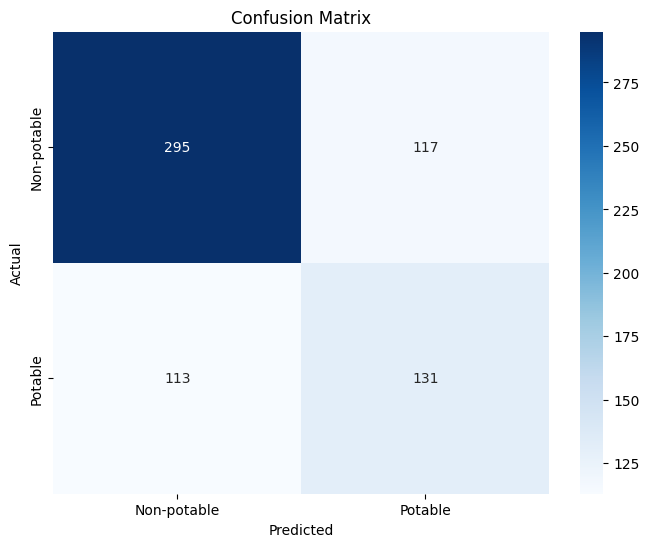

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Make predictions
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).flatten()

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-potable', 'Potable'], yticklabels=['Non-potable', 'Potable'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Step 5: Refine the Model Further


---


**Objective**: Improve the model's accuracy by experimenting with different architectures and hyperparameters.

**Outcome**: A potentially more accurate model with better predictive performance.

**Instructions**:

* Experiment with additional hidden layers, different activation functions, or more epochs.
* Evaluate the changes in performance and document the results.

Epoch 1/150
66/66 [==============================] - 2s 6ms/step - loss: 0.6734 - accuracy: 0.6083 - val_loss: 0.6557 - val_accuracy: 0.6260
Epoch 2/150
66/66 [==============================] - 0s 4ms/step - loss: 0.6482 - accuracy: 0.6355 - val_loss: 0.6359 - val_accuracy: 0.6565
Epoch 3/150
66/66 [==============================] - 0s 4ms/step - loss: 0.6282 - accuracy: 0.6503 - val_loss: 0.6175 - val_accuracy: 0.6870
Epoch 4/150
66/66 [==============================] - 0s 4ms/step - loss: 0.6113 - accuracy: 0.6679 - val_loss: 0.6101 - val_accuracy: 0.6718
Epoch 5/150
66/66 [==============================] - 0s 3ms/step - loss: 0.6085 - accuracy: 0.6760 - val_loss: 0.6017 - val_accuracy: 0.6927
Epoch 6/150
66/66 [==============================] - 0s 4ms/step - loss: 0.6059 - accuracy: 0.6823 - val_loss: 0.6055 - val_accuracy: 0.6737
Epoch 7/150
66/66 [==============================] - 0s 3ms/step - loss: 0.5997 - accuracy: 0.6880 - val_loss: 0.6028 - val_accuracy: 0.6947
Epoch 8/150
6

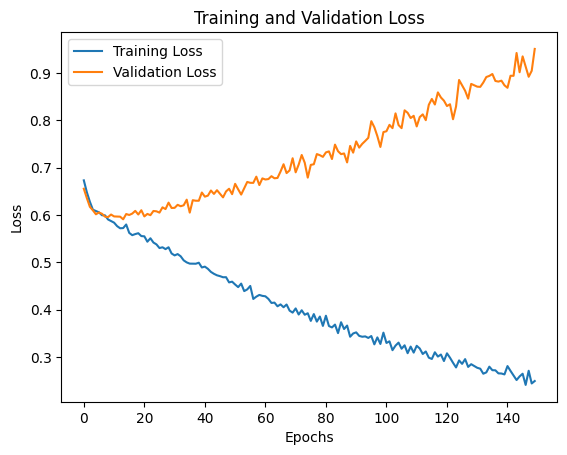

In [ ]:
# Example: Add more hidden layers and use a different activation function
model = Sequential()
model.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with more epochs
history = model.fit(X_train, y_train, epochs=150, validation_split=0.2, batch_size=32)

# Re-evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Refined Test Accuracy: {accuracy:.4f}")

# Visualize the training process again
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


# Visualization 4: Evaluate Model Improvements with Confusion Matrix
**Objective**: Understand the improvements in classification performance through a refined confusion matrix.

**Outcome**: Updated confusion matrix showing true positives, true negatives, false positives, and false negatives with the refined model.

**Instructions**:

* Plot the confusion matrix to visualize the classification performance after refining the model.

21/21 [==============================] - 0s 3ms/step


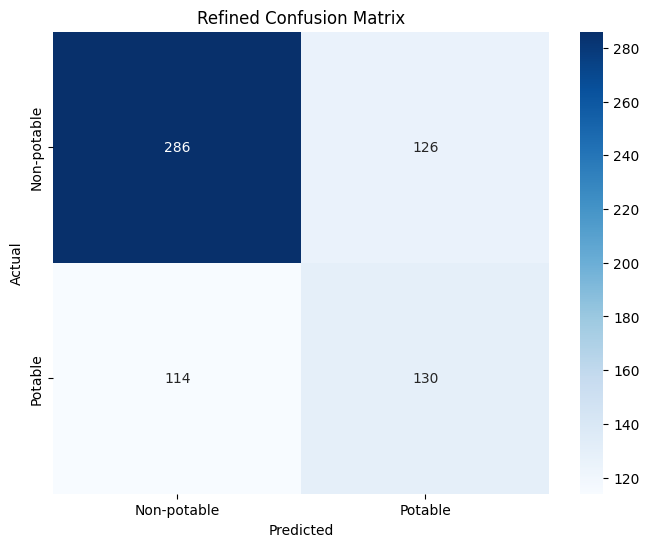

In [ ]:
# Make new predictions with the refined model
y_pred_refined = model.predict(X_test)
y_pred_refined = (y_pred_refined > 0.5).astype(int).flatten()

# Compute new confusion matrix
conf_matrix_refined = confusion_matrix(y_test, y_pred_refined)

# Plot refined confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_refined, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-potable', 'Potable'], yticklabels=['Non-potable', 'Potable'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Refined Confusion Matrix')
plt.show()